# NBA games data : EDA 


 Here is the steps :
1. Load the data
2. Quick look on the datasets
3. EDA : answer some questions with data visualisation !

# Load packages

In [3]:
import pandas as pd
import numpy as np
from math import pi

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown

# Load data

In [4]:
games_details = pd.read_csv(r"C:\Users\ranje\Documents\datas\nba\games_details.csv")
players = pd.read_csv(r"C:\Users\ranje\Documents\datas\nba\players.csv")
teams = pd.read_csv(r"C:\Users\ranje\Documents\datas\nba\teams.csv")
ranking = pd.read_csv(r"C:\Users\ranje\Documents\datas\nba\ranking.csv")
games  = pd.read_csv(r"C:\Users\ranje\Documents\datas\nba\games.csv")

C:\Users\ranje\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Quick datasets overview 

In [5]:
def print_missing_values(df):
    df_null = pd.DataFrame(len(df) - df.notnull().sum(), columns = ['Count'])
    df_null = df_null[df_null['Count'] > 0].sort_values(by='Count', ascending=False)
    df_null = df_null/len(df)*100
    
    if len(df_null) == 0:
        display(Markdown('No missing value.'))
        return
    
    x = df_null.index.values
    height = [e[0] for e in df_null.values]
    
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.bar(x, height, width=0.8)
    plt.xticks(x, x, rotation=60)
    plt.xlabel('Columns')
    plt.ylabel('Percentage')
    plt.title('Percentage of missing values in columns')
    plt.show()
    
def dataset_overview(df, df_name):
    display(Markdown(f'### {df_name} dataset overview'))
    display(Markdown(f'dataset shape : {df.shape}'))
    display(Markdown(f'#### Display 5 first rows'))
    display(df.head())
    display(Markdown('*****'))
    display(Markdown(f'#### Describe dataset'))
    display(df.describe().T)
    display(Markdown('*****'))
    display(Markdown(f'#### Missing values'))
    print_missing_values(df)

### games_details dataset overview

dataset shape : (645953, 29)

#### Display 5 first rows

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,23:54,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,NaN,30:52,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,NaN,33:46,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0


*****

#### Describe dataset

,count,mean,std,min,25%,50%,75%,max
GAME_ID,645953.0,2.165952e+07,5.569116e+06,1.030000e+07,2.060113e+07,2.120062e+07,2.170079e+07,5.200021e+07
TEAM_ID,645953.0,1.610613e+09,8.650314e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
PLAYER_ID,645953.0,3.716935e+05,7.348620e+06,1.500000e+01,2.435000e+03,2.011560e+05,2.031240e+05,1.962938e+09
FGM,540350.0,3.582408e+00,3.023962e+00,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,2.800000e+01
FGA,540350.0,7.891298e+00,5.665752e+00,0.000000e+00,3.000000e+00,7.000000e+00,1.100000e+01,5.000000e+01
FG_PCT,540350.0,4.162029e-01,2.516336e-01,0.000000e+00,2.630000e-01,4.290000e-01,5.710000e-01,1.000000e+00
FG3M,540350.0,7.657315e-01,1.216917e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01
FG3A,540350.0,2.151618e+00,2.547737e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,2.400000e+01
FG3_PCT,540350.0,1.991665e-01,2.894474e-01,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e-01,1.000000e+00
FTM,540350.0,1.734931e+00,2.353475e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.600000e+01


*****

#### Missing values

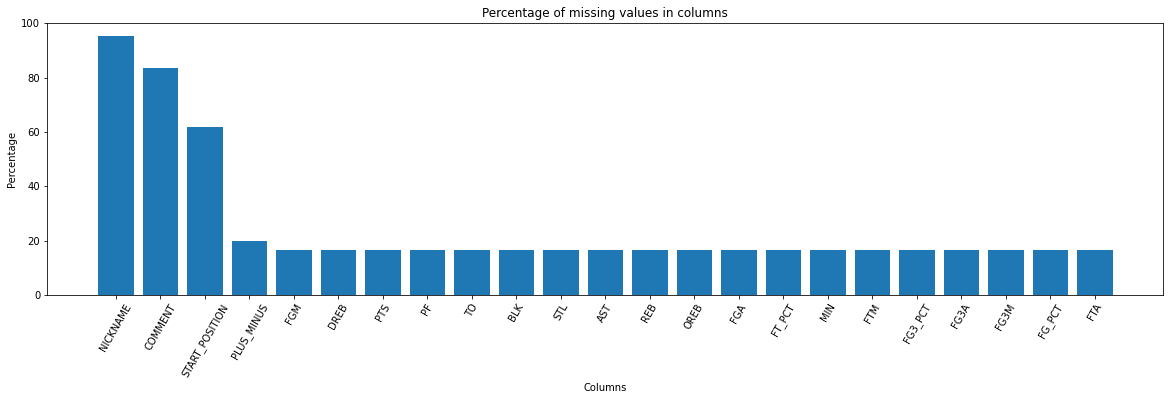

In [6]:
dataset_overview(games_details, 'games_details')

In [7]:
dataset_overview(players, 'players')

### players dataset overview

dataset shape : (7228, 4)

#### Display 5 first rows

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019


*****

#### Describe dataset

,count,mean,std,min,25%,50%,75%,max
TEAM_ID,7228.0,1.610613e+09,8.723521e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
PLAYER_ID,7228.0,2.355862e+06,6.106688e+07,2.440000e+02,2.007680e+05,2.023465e+05,2.039100e+05,1.962938e+09
SEASON,7228.0,2.014160e+03,3.126216e+00,2.009000e+03,2.012000e+03,2.014000e+03,2.017000e+03,2.019000e+03


*****

#### Missing values

No missing value.

### teams dataset overview

dataset shape : (30, 14)

#### Display 5 first rows

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


*****

#### Describe dataset

,count,mean,std,min,25%,50%,75%,max
LEAGUE_ID,30.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
TEAM_ID,30.0,1.610613e+09,8.803408,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
MIN_YEAR,30.0,1.969700e+03,16.698441,1.946000e+03,1.952000e+03,1.970000e+03,1.979000e+03,2.002000e+03
MAX_YEAR,30.0,2.019000e+03,0.000000,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03
YEARFOUNDED,30.0,1.969700e+03,16.698441,1.946000e+03,1.952000e+03,1.970000e+03,1.979000e+03,2.002000e+03
ARENACAPACITY,26.0,1.855331e+04,3916.923362,0.000000e+00,1.864150e+04,1.913100e+04,1.979075e+04,2.171100e+04


*****

#### Missing values

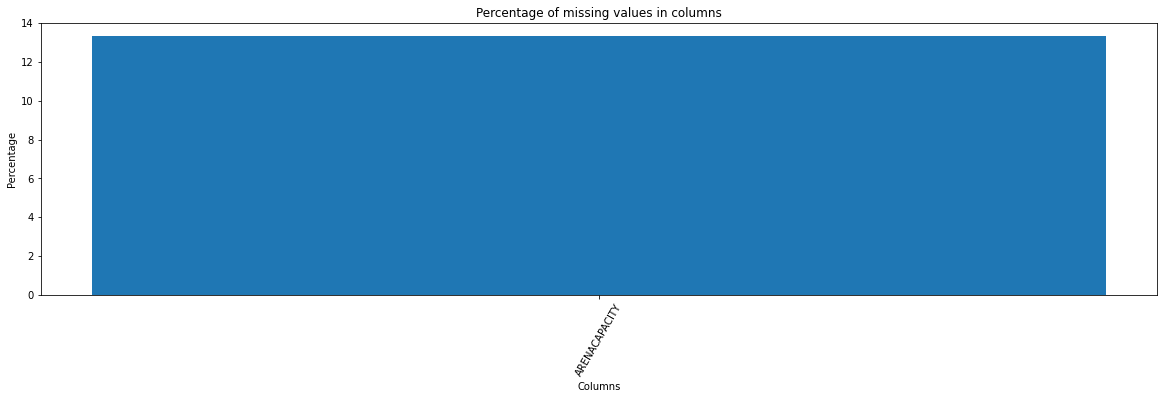

In [8]:
dataset_overview(teams, 'teams')

### ranking dataset overview

dataset shape : (201792, 13)

#### Display 5 first rows

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612756,0,22021,2022-03-12,West,Phoenix,67,53,14,0.791,28-8,25-6,NaN
1,1610612744,0,22021,2022-03-12,West,Golden State,68,46,22,0.676,28-7,18-15,NaN
2,1610612763,0,22021,2022-03-12,West,Memphis,68,46,22,0.676,24-10,22-12,NaN
3,1610612762,0,22021,2022-03-12,West,Utah,67,42,25,0.627,24-10,18-15,NaN
4,1610612742,0,22021,2022-03-12,West,Dallas,67,41,26,0.612,23-12,18-14,NaN


*****

#### Describe dataset

,count,mean,std,min,25%,50%,75%,max
TEAM_ID,201792.0,1.610613e+09,8.640908,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
LEAGUE_ID,201792.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
SEASON_ID,201792.0,2.140154e+04,2393.667432,1.200300e+04,2.200600e+04,2.201100e+04,2.201600e+04,2.202100e+04
G,201792.0,5.647545e+01,28.505551,0.000000e+00,3.300000e+01,6.600000e+01,8.200000e+01,8.200000e+01
W,201792.0,2.824128e+01,17.214043,0.000000e+00,1.400000e+01,2.800000e+01,4.200000e+01,7.300000e+01
L,201792.0,2.823418e+01,17.205158,0.000000e+00,1.400000e+01,2.800000e+01,4.100000e+01,7.200000e+01
W_PCT,201792.0,4.927449e-01,0.187940,0.000000e+00,3.710000e-01,5.000000e-01,6.210000e-01,1.000000e+00
RETURNTOPLAY,3990.0,6.000000e-01,0.489959,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


*****

#### Missing values

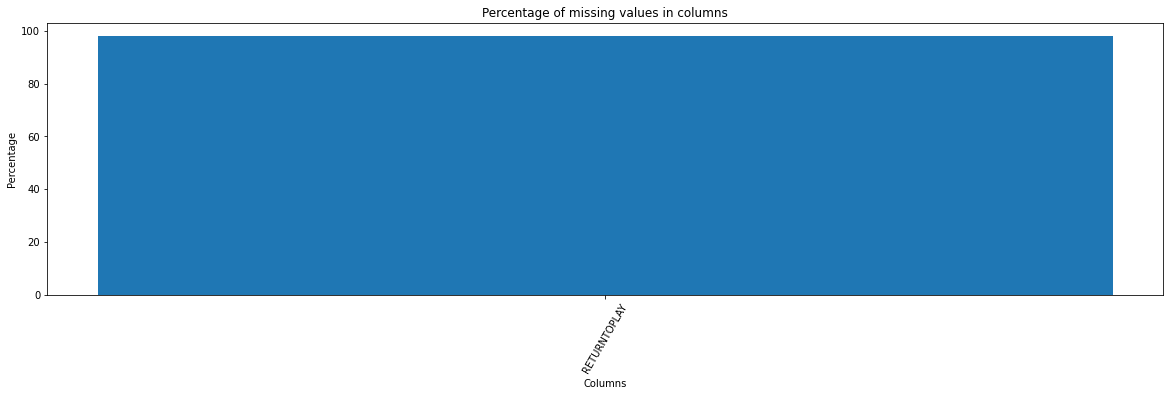

In [9]:
dataset_overview(ranking, 'ranking')

### games dataset overview

dataset shape : (25796, 21)

#### Display 5 first rows

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0


*****

#### Describe dataset

,count,mean,std,min,25%,50%,75%,max
GAME_ID,25796.0,2.169208e+07,5.496041e+06,1.030000e+07,2.060109e+07,2.120040e+07,2.170070e+07,5.200021e+07
HOME_TEAM_ID,25796.0,1.610613e+09,8.638857e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
VISITOR_TEAM_ID,25796.0,1.610613e+09,8.654846e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
SEASON,25796.0,2.011798e+03,5.397985e+00,2.003000e+03,2.007000e+03,2.012000e+03,2.016000e+03,2.021000e+03
TEAM_ID_home,25796.0,1.610613e+09,8.638857e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
PTS_home,25697.0,1.031060e+02,1.317473e+01,3.600000e+01,9.400000e+01,1.030000e+02,1.120000e+02,1.680000e+02
FG_PCT_home,25697.0,4.603128e-01,5.662854e-02,2.500000e-01,4.210000e-01,4.590000e-01,5.000000e-01,6.840000e-01
FT_PCT_home,25697.0,7.597049e-01,1.006920e-01,1.430000e-01,6.960000e-01,7.650000e-01,8.290000e-01,1.000000e+00
FG3_PCT_home,25697.0,3.558964e-01,1.119400e-01,0.000000e+00,2.860000e-01,3.550000e-01,4.290000e-01,1.000000e+00
AST_home,25697.0,2.273678e+01,5.177566e+00,6.000000e+00,1.900000e+01,2.300000e+01,2.600000e+01,5.000000e+01


*****

#### Missing values

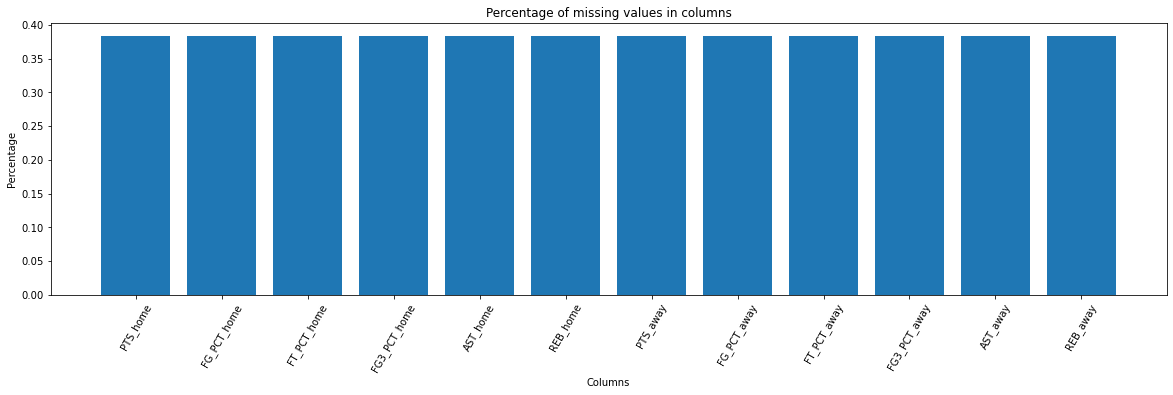

In [10]:
dataset_overview(games, 'games')

##  EDA : 


## Who are the players with most games played ?

In [11]:
def plot_top(df, column, label_col=None, max_plot=5):
    top_df = df.sort_values(column, ascending=False).head(max_plot)
    
    height = top_df[column]
    x = top_df.index if label_col == None else top_df[label_col]
    
    gold, silver, bronze, other = ('#FFA400', '#bdc3c7', '#cd7f32', '#3498db')
    colors = [gold if i == 0 else silver if i == 1 else bronze if i == 2 else other for i in range(0, len(top_df))]
    
    fig, ax = plt.subplots(figsize=(18, 7))
    ax.bar(x, height, color=colors)
    plt.xticks(x, x, rotation=60)
    plt.xlabel(label_col)
    plt.ylabel(column)
    plt.title(f'Top {max_plot} of {column}')
    plt.show()

In [12]:
players_name = games_details['PLAYER_NAME']
val_cnt = players_name.value_counts().to_frame().reset_index()
val_cnt.columns = ['PLAYER_NAME', 'Number of games']

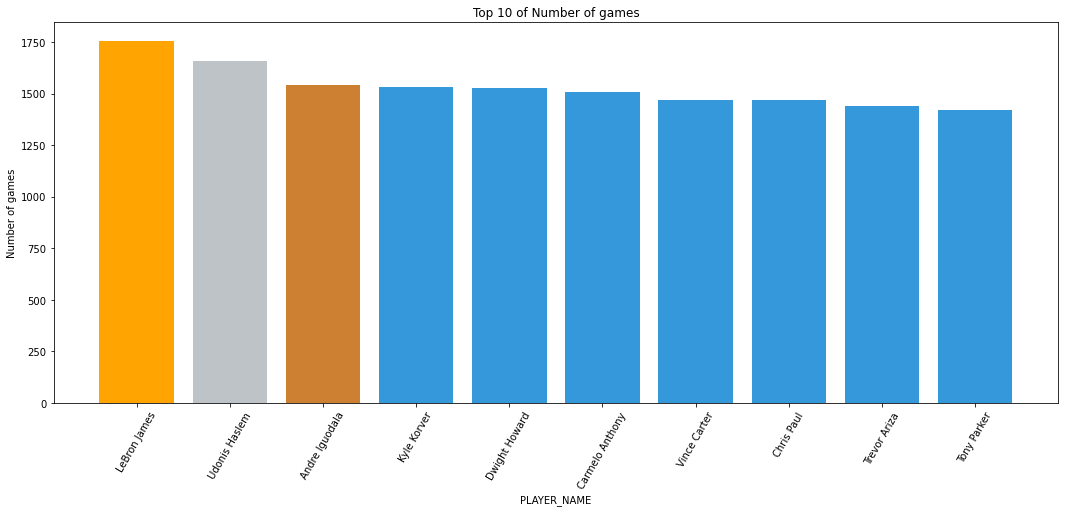

In [13]:
plot_top(val_cnt, column='Number of games', label_col='PLAYER_NAME', max_plot=10)

# Is most game played means most time played ?

In [14]:
def convert_min(x):
    if pd.isna(x):
        return 0
    x = str(x).split(':')
    if len(x) < 2:
        return int(x[0])
    else: 
        return int(x[0])*60+int(x[1])

In [15]:
df_tmp = games_details[['PLAYER_NAME', 'MIN']]
df_tmp.loc[:,'MIN'] = df_tmp['MIN'].apply(convert_min)
agg = df_tmp.groupby('PLAYER_NAME').agg('sum').reset_index()
agg.columns = ['PLAYER_NAME', 'Number of seconds played']

C:\Users\ranje\anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


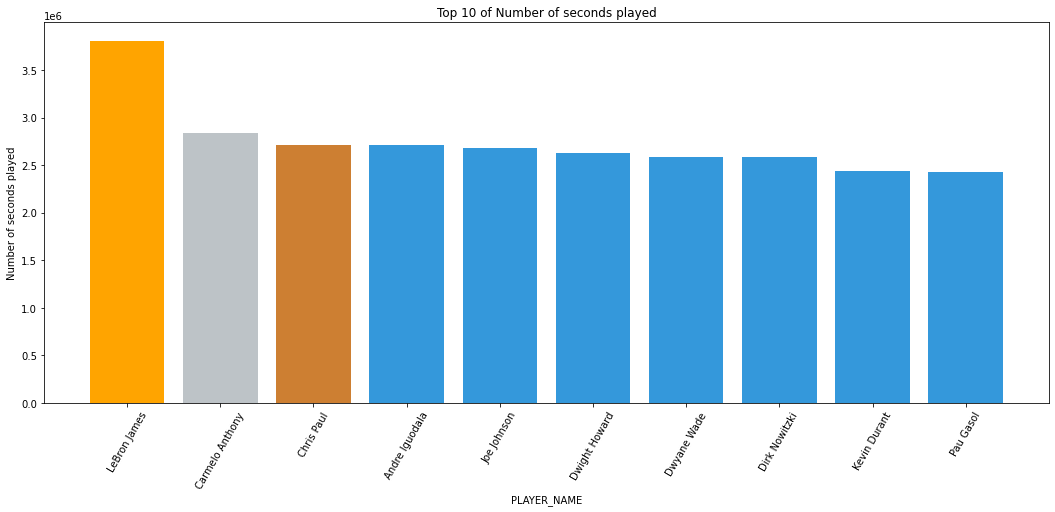

In [16]:
plot_top(agg, column='Number of seconds played', label_col='PLAYER_NAME', max_plot=10)

And the answer is yes ! LeBron James is truly a living legend ! ;) 

# What are the Lebron James average stats compare to overall stats ?

In [17]:
stats_cols = {
    'FGM':'Field Goals Made',
    'FGA':'Field Goals Attempted',
    'FG_PCT':'Field Goal Percentage',
    'FG3M':'Three Pointers Made',
    'FG3A':'Three Pointers Attempted',
    'FG3_PCT':'Three Point Percentage',
    'FTM':'Free Throws Made',
    'FTA':'Free Throws Attempted',
    'FT_PCT':'Free Throw Percentage',
    'OREB':'Offensive Rebounds',
    'DREB':'Defensive Rebounds',
    'REB':'Rebounds',
    'AST':'Assists',
    'TO':'Turnovers',
    'STL':'Steals',
    'BLK':'Blocked Shots',
    'PF':'Personal Foul',
    'PTS':'Points',
    'PLUS_MINUS':'Plus-Minus'
}

In [18]:
def agg_on_columns(df, agg_var, operation=['mean']):
    return df[agg_var].agg(operation)

# Remove players that didn't played at a game
df_tmp = games_details[~games_details['MIN'].isna()]
del df_tmp['MIN']

# Define key statistics columns, one for percentage variable and one for other important statistics
prct_var = ['FG_PCT', 'FG3_PCT', 'FT_PCT']
other_var = ['REB', 'AST', 'STL', 'PF', 'BLK'] 

# Create a specific dataset for LeBron James
lebron_james_df = df_tmp[df_tmp['PLAYER_NAME'] == 'LeBron James']

overall_agg_prct = agg_on_columns(df=df_tmp, agg_var=prct_var, operation=['mean'])
overall_agg_other = agg_on_columns(df=df_tmp, agg_var=other_var, operation=['mean'])

lebron_james_stats_prct = agg_on_columns(df=lebron_james_df, agg_var=prct_var, operation=['mean'])
lebron_james_stats_other = agg_on_columns(df=lebron_james_df, agg_var=other_var, operation=['mean'])

In [19]:
stats_prct = pd.concat([lebron_james_stats_prct, overall_agg_prct]) 
stats_other = pd.concat([lebron_james_stats_other, overall_agg_other]) 

stats_prct.index = ['Lebron James', 'overall stats']
stats_other.index = ['Lebron James', 'overall stats']

In [20]:
def rename_df(df, col_dict):
    cols = df.columns
    new_cols = [(col_dict[c] if c in col_dict else c) for c in cols]
    df.columns = new_cols
    return df

stats_prct = rename_df(stats_prct, col_dict=stats_cols)
stats_other = rename_df(stats_other, col_dict=stats_cols)

In [21]:
def radar_plot(ax, df, max_val=1):
    # number of variable
    categories=list(df)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=12)

    # Draw ylabels
    ax.set_rlabel_position(0)
    yticks = [max_val*i/4 for i in range(1,4)]
    plt.yticks(yticks, [str(e) for e in yticks], color="grey", size=10)
    plt.ylim(0,max_val)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    colors = ['b','r','g']
    for i in range(len(df)):
        values = df.values[i].flatten().tolist()
        values += values[:1]
        color = colors[i]

        # Plot data
        ax.plot(angles, values, linewidth=1, linestyle='solid', color=color, label=df.index[i])

        # Fill area
        ax.fill(angles, values, color, alpha=0.1)
     
    # Add legend
    plt.legend(loc=0, bbox_to_anchor=(0.1, 0.1), prop={'size': 13})
    

#### Stats comparison between Lebron James and overall statistics

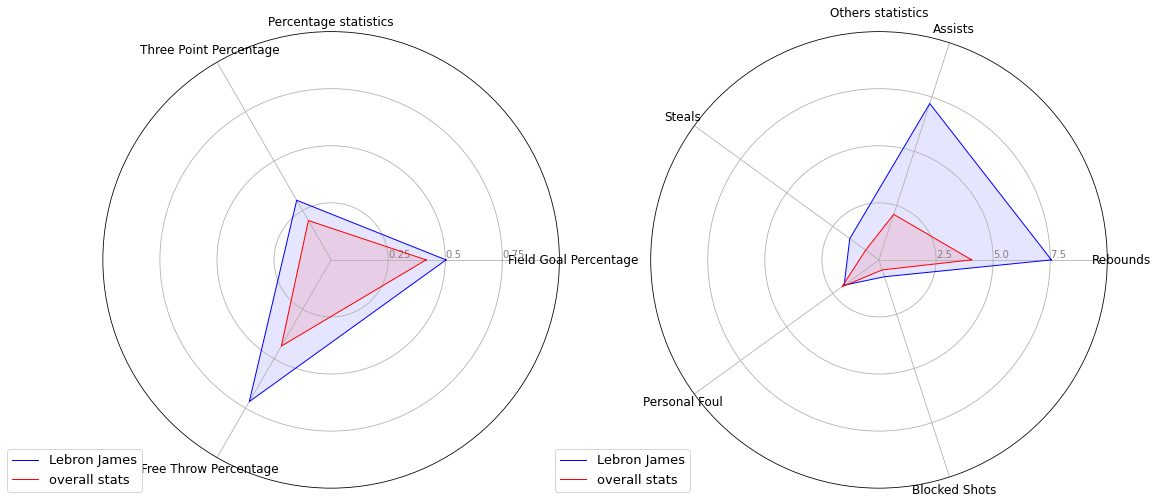

In [22]:
display(Markdown('#### Stats comparison between Lebron James and overall statistics'))
fig, ax = plt.subplots(figsize=(18, 9))

ax = plt.subplot(121, polar=True)
ax.set_title('Percentage statistics')
radar_plot(ax=ax, df=stats_prct, max_val=1)

ax = plt.subplot(122, polar=True)
ax.set_title('Others statistics')
radar_plot(ax=ax, df=stats_other, max_val=10)

plt.show()

As we can see Lebron James is above average ! ;)

# Compare players statistics (example: Curry vs Harden)

In [23]:
def get_players_stats(player_one, player_two):
    # Remove players that didn't played at a game
    df_tmp = games_details[~games_details['MIN'].isna()]
    del df_tmp['MIN']

    # Define key statistics columns, one for percentage variable and one for other important statistics
    prct_var = ['FG_PCT', 'FG3_PCT', 'FT_PCT']
    other_var = ['REB', 'AST', 'STL', 'PF', 'BLK'] 

    # Create a specific dataset for LeBron James
    player_one_df = df_tmp[df_tmp['PLAYER_NAME'] == player_one]
    player_two_df = df_tmp[df_tmp['PLAYER_NAME'] == player_two]

    player_one_agg_prct = agg_on_columns(df=player_one_df, agg_var=prct_var, operation=['mean'])
    player_one_agg_other = agg_on_columns(df=player_one_df, agg_var=other_var, operation=['mean'])

    player_two_agg_prct = agg_on_columns(df=player_two_df, agg_var=prct_var, operation=['mean'])
    player_two_agg_other = agg_on_columns(df=player_two_df, agg_var=other_var, operation=['mean'])
    
    stats_prct = pd.concat([player_one_agg_prct, player_two_agg_prct]) 
    stats_other = pd.concat([player_one_agg_other, player_two_agg_other]) 

    stats_prct.index = [player_one, player_two]
    stats_other.index = [player_one, player_two]
    
    stats_prct = rename_df(stats_prct, col_dict=stats_cols)
    stats_other = rename_df(stats_other, col_dict=stats_cols)
    
    return stats_prct, stats_other

def show_player_stats_comparison(stats_prct, stats_other):
    fig, ax = plt.subplots(figsize=(18, 9))

    ax = plt.subplot(121, polar=True)
    ax.set_title('Percentage statistics')
    radar_plot(ax=ax, df=stats_prct, max_val=1)

    ax = plt.subplot(122, polar=True)
    ax.set_title('Others statistics')
    radar_plot(ax=ax, df=stats_other, max_val=10)

    plt.show()

In [24]:
player_one = 'Stephen Curry'
player_two = 'James Harden'
# Function code just hide above because it's a repeat from previous part
stats_prct, stats_other = get_players_stats(player_one=player_one, player_two=player_two)

#### Stats comparison between Stephen Curry and James Harden

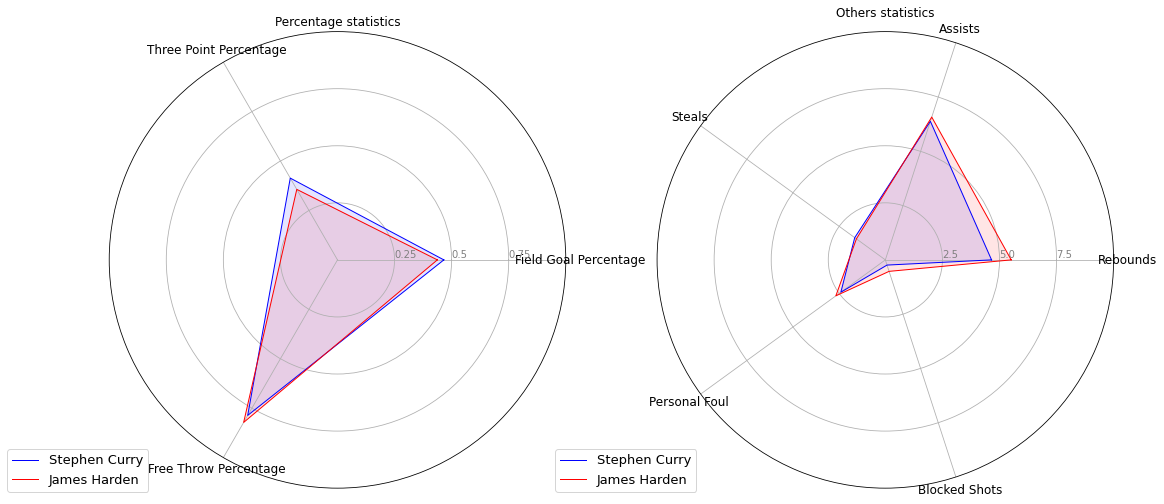

In [25]:
display(Markdown(f'#### Stats comparison between {player_one} and {player_two}'))
show_player_stats_comparison(stats_prct, stats_other)

# Which team has the most winning since 2004 season ?

In [26]:
winning_teams = np.where(games['HOME_TEAM_WINS'] == 1, games['HOME_TEAM_ID'], games['VISITOR_TEAM_ID'])
winning_teams = pd.DataFrame(winning_teams, columns=['TEAM_ID'])
winning_teams = winning_teams.merge(teams[['TEAM_ID', 'NICKNAME']], on='TEAM_ID')['NICKNAME'].value_counts().to_frame().reset_index()
winning_teams.columns = ['TEAM NAME', 'Number of wins']

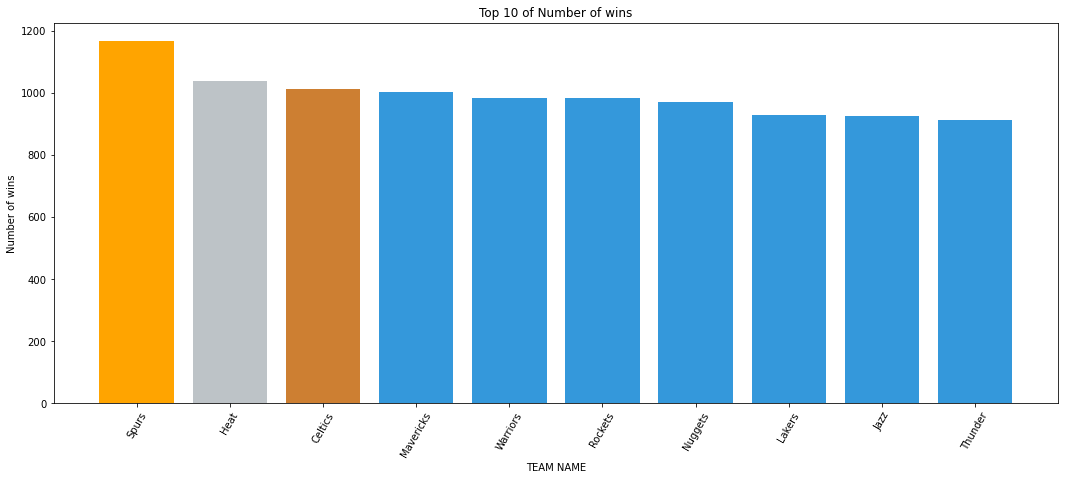

In [27]:
plot_top(winning_teams, column='Number of wins', label_col='TEAM NAME', max_plot=10)

# Kobe Bryant NBA story

## How many games he played ?

In [28]:
bryant_games = games_details[games_details['PLAYER_NAME'] == 'Kobe Bryant']

In [29]:
display(Markdown(f'He played **{len(bryant_games)}** games !'))

He played **1102** games !

## What's his overall statistics and is it better than LeBron James ?

In [30]:
player_one = 'Kobe Bryant'
player_two = 'LeBron James'
# Function code just hide above because it's a repeat from previous part
stats_prct, stats_other = get_players_stats(player_one=player_one, player_two=player_two)

#### Stats comparison between Kobe Bryant and LeBron James

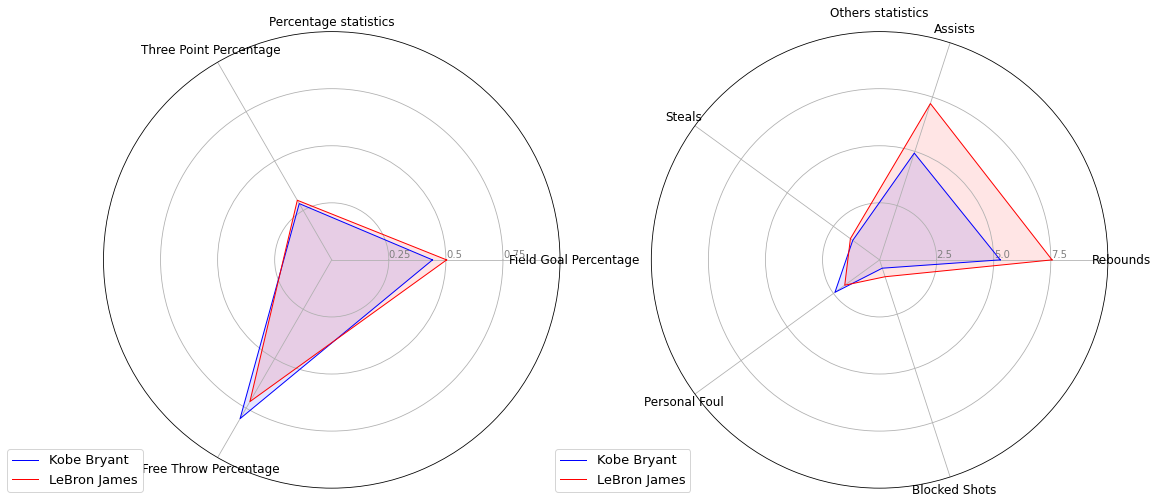

In [31]:
display(Markdown(f'#### Stats comparison between {player_one} and {player_two}'))
show_player_stats_comparison(stats_prct, stats_other)

## Where did he played ?

In [32]:
teams_id = bryant_games['TEAM_ID'].unique()
bryant_teams = teams[teams['TEAM_ID'].isin(teams_id)]['NICKNAME'].values.tolist()
display(Markdown(f"He played on the following teams : **{' '.join(bryant_teams)}**."))

He played on the following teams : **Lakers**.